In [647]:
import importlib.util
if importlib.util.find_spec("numpy") is None:
    %pip install numpy
if importlib.util.find_spec("pandas") is None:
    %pip install pandas
if importlib.util.find_spec("matplotlib") is None:
    %pip install matplotlib
if importlib.util.find_spec("sklearn") is None:
    %pip install scikit-learn

# Part 1 Ridge Regression & Dataset Generation

Linear regression is a statistical method used to find a relationship between input features and an output variable. Simple models make predictions via computing a weighted sum of input features, for example:

$$ \hat{y} = \Theta_0 + \Theta_1 x_1 + \Theta_2x_2 + ... \Theta_nx_n $$

$\hat{y}$ = Predicted Value
 
$\Theta$ = Weights
 
$x$ = Instance Values


Which can be simplified to a matrix operation:

$$ \hat{y} = h_\Theta (x) = \Theta^Tx $$

$\hat{y}$ = Predicted Value
 
$\Theta$ = Weight Vector
 
$x$ = Instance Vector


## Ridge Regression


However, simple traditional regression models can fail to fit their data due to the underfitting or overfitting of their data. 

*Underfitting* can be minimized by:
   - Increasing model complexity
   - Feature engineering
   - Reducing model constraints

 *Overfitting* can be minimized by:
   - Increasing training data
   - Using cross-fold validation
   - Reducing dimensionality
   - Constraining the model 

Constraining the model requires the introduction of a *regularisation* term, which aims to reduce the effect of the training data , favouring the minimisation of model weights. 

 Within this first section, I will be investigating a technique known as ridge regression regularisation. I will explore how it's implementation on linear and polynomial regression models can affect the performance of regression models, aiming to reduce overfitting of the data. Ridge regression, the *squared l2 regularisation*, is a regularised linear regression model, which contains a *regularisation* term which is added to the models cost function. 

The models regularisation term is:

$$ \alpha \sum_{i=1}^{n} \Theta^2_i + \epsilon $$

Thus the Ridge Regression cost function $J(\Theta)$ is:
$$ J(\Theta) = MSE(\Theta) + \alpha \sum_{i=1}^{n} \Theta^2_i + \epsilon $$

Vectorising the cost function gives us:

$$ \mathcal{L}(w) = ||y - Xw||^2_2 + \alpha ||w||^2_2 $$

Assuming that:

- $X \in \mathbb{R}^{n \times m}$ (design matrix with $n$ samples and $m$ features),
- $w \in \mathbb{R}^m$ (weight vector),
- $y \in \mathbb{R}^n$ (target vector),

The closed form solution that minimises $\mathcal{L}(w)$ is:


$$ \hat{w} = (X^\top X + \alpha I_m)^{-1} X^\top y $$

### Closed Form Ridge Regressor


Implementing the closed form solution is quite simple. We can define a ClosedFormRegressor, in a similar format as sci-kit's other regressors. The class is initialised with empty weights, as they will be set via when a dataset is being fit.

In [648]:
import numpy as np

class ClosedFormRegressor:
    def __init__(self, alpha: float):
        self.alpha = alpha
        self.w = None
    def fit(x,y): ...
    def predict(x): ...


### Fit Method

The `fit` method here implements the closed form solution. A bias-trick is introduced, by initializing a column of ones and then stacking it with x, and then setting $I_{0,0}$ to 0. The regularisation parameter is $\alpha$ is introduced here alongside $I$, and the weights are also initialised here.

In [649]:
def fit(self, x, y):
      # Bias column
      b = np.ones(x.shape[0],)[:, np.newaxis]
      x = np.column_stack((b, x))

      I = np.identity(x.shape[1])
      I[0, 0] = 0

      # Closed form solution
      self.w = np.linalg.inv(x.T @ x + self.alpha * I) @ x.T @ y

ClosedFormRegressor.fit = fit

### Predict Method

The `predict` method is the same as other regression models, using the computational sum of weights, implemented via dot product, to produce a prediction:

$$ \hat{y} = X \hat{w} $$

In [650]:
def predict(self, x):
      b = np.ones(x.shape[0],)[:, np.newaxis]
      x = np.column_stack((b, x))
      return x @ self.w

ClosedFormRegressor.predict = predict

## Polynomial Dataset Generation

In order to perform any sort of regression, we must obtain some data. For this investigation, I will be generating data randomly every time, using the function below:

$$ y = \sum_{k=0}^{n} a_k x^k + \epsilon $$

Where:

- $y$ is the output element.
- $x$ is the input element, where $x \in [-5, 5]$.
- $a_k$ are polynomial co-efficients, where $a_k \sim U(0, 1)$.
- $n$ is the polynomial degree.
- $\epsilon$ is added in order to simulate noise, where $\epsilon \sim N(0, 1)$.

Thus, I have defined a function that takes two arguments: degree, and n_samples. Degree is polynomial degree, and n_samples is the quantity of data to be generated. It returns a list of input values, and a list of evaluated samples.

In [651]:
def generate_polynomial_dataset(degree: int, n_samples: int):
    x_set = []
    y_set = []
    for i in range(n_samples):
        # Generate a random x value
        x = np.random.uniform(-5, 5)

        # Generate a polynomial y value 
        y = sum(np.random.uniform(0, 1) * (x ** i) for i in range(degree+1)) + np.random.normal(0,1)

        # Append to the dataset
        x_set.append(x)
        y_set.append(y)
    return np.array(x_set), np.array(y_set)

### Example Dataset Generation and Visualisation

Thus, we can generate datasets of variable polynomial degree.

### Linear Dataset

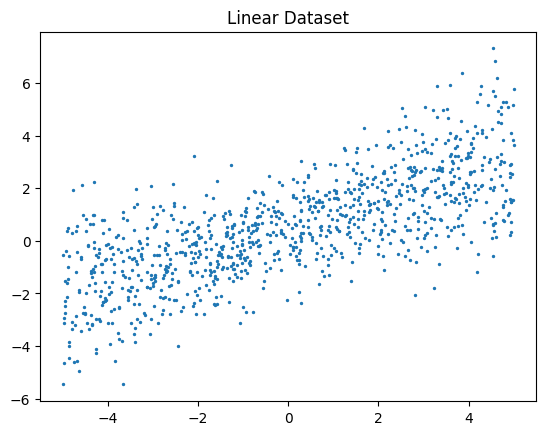

In [652]:
import matplotlib.pyplot as plt

x, y = generate_polynomial_dataset(1, 1000)
plt.scatter(x, y, s=2)
plt.title("Linear Dataset")
plt.show()

### Quadratic Dataset

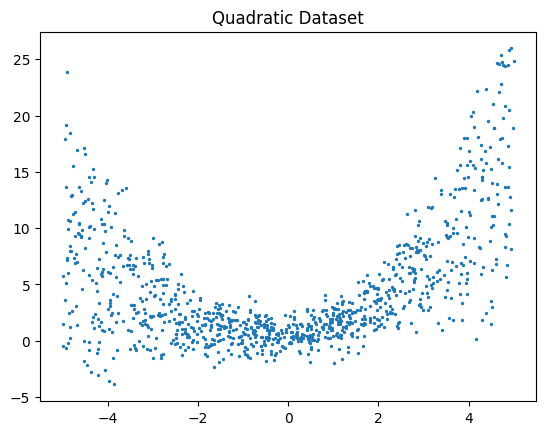

In [653]:

x, y = generate_polynomial_dataset(2, 1000)
plt.scatter(x, y, s=2)
plt.title("Quadratic Dataset")
plt.show()

### Cubic

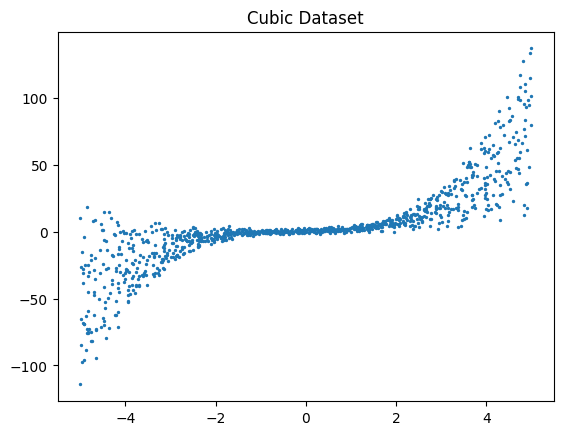

In [654]:
x, y = generate_polynomial_dataset(3, 1000)
plt.scatter(x, y, s=2)
plt.title("Cubic Dataset")
plt.show()

For ease of use and training, I have imported scikit's `train_test_split` function in order to generate training and test sets.

In [655]:
from sklearn.model_selection import train_test_split

def get_split(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # If the dataset is 1D, reshape it to 2D for sklearn
    # This is necessary for sklearn to work properly
    
    if x_train.ndim == 1:
        x_train = x_train.reshape(-1, 1)
        x_test = x_test.reshape(-1, 1)
    return x_train, x_test, y_train, y_test

In order to effectively perform regression on polynomials, it is important to perform feature scaling, as such I have defined a function in order to return a feature-scaled dataset.

In [656]:
from sklearn.preprocessing import StandardScaler

def get_split_poly(x, degree):
    x_poly = x
    for i in range(1,degree):
        x_poly = np.column_stack((x_poly, x ** (i + 1)))
    return x_poly

I have also defined a simple graphing function to visualise regression results. It takes a regression model's co-efficients and intercept then generates the function of the form:

$$ y = b + a_1x + a_2x^2 + ... + a_nk^n $$

For any estimated polynomial regression.

In [657]:
def plot_ridge_regression(alphas, x_test, y_test, results, title, ax, ylim=(-100, 100), ):
    x = np.linspace(-5, 5, 1000)

    #ylim
    ax.set_xlim(-5, 5)
    ax.set_ylim(ylim)
    # generate len(alphas) colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(alphas)))
    colors = colors[::-1]  # Reverse the order of colors
    ax.scatter(x_test, y_test, color="blue", alpha=0.5, label="Test Data")
    for idx, result in enumerate(results): 
        y = sum(result[i] * (x ** i) for i in range(len(result)))
        ax.plot(x, y, label=f"{alphas[idx]}α", color=colors[idx], lw=5, alpha=0.9)

        # Scatter plot of the test data
        ax.set_title(f"{title}")
        ax.legend()
    plt.tight_layout()

In [658]:
def get_ylim(y_train):
    # Get the min and max values of x_train and y_train
    y_min, y_max = np.min(y_train), np.max(y_train)

    ylim = (y_min , y_max )  
    return ylim

In [659]:
def plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, sample_size):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)  # Set the figure size
    # Set the x-axis limits for both subplots

    plot_ridge_regression(test_alphas, x_test, y_test, sgd_results,f"SGD @ {sample_size}",ax1,get_ylim(y_train))
    plot_ridge_regression(test_alphas, x_test, y_test, cls_results,f"CLS @ {sample_size}",ax2,get_ylim(y_train))

## Stochastic Gradient Descent Regression

In [660]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [661]:
def get_sgd_results(alpha,x_train, y_train):
    sgd = SGDRegressor(penalty='l2', alpha=alpha, max_iter=1000)
    sgd.fit(x_train, y_train)

    # Function co-efficents + intercept for plotting of the form y = w0 + w1*x + w2*x^2 + ... + wn*x^n|
    sgd_func = np.array(sgd.coef_)
    sgd_func = np.append(sgd.intercept_,sgd_func,)

    return sgd_func


def get_cls_results(alpha,x_train, y_train):
    cls = ClosedFormRegressor(alpha=alpha)
    cls.fit(x_train, y_train)
    cls_func = np.array(cls.w[1:])
    cls_func = np.append( cls.w[0],cls_func,)

    return cls_func

## Regression Experimentation

In order to investigate the closed form solution, we will be comparing a non closed form solution via a stochastic gradient descent regression model, with ridge regression elasticity.

## Hypothesis

*If the regularisation increases, the closed form solution will be more susceptible to overfitting than the stochastic gradient descent model.*

We will be using alphas of: 0, 0.1, 100, 1000, 10000



In [662]:
test_alphas = [0, 0.1, 100,1000,10000]

Let's take a look at the results.

### Linear Dataset regression

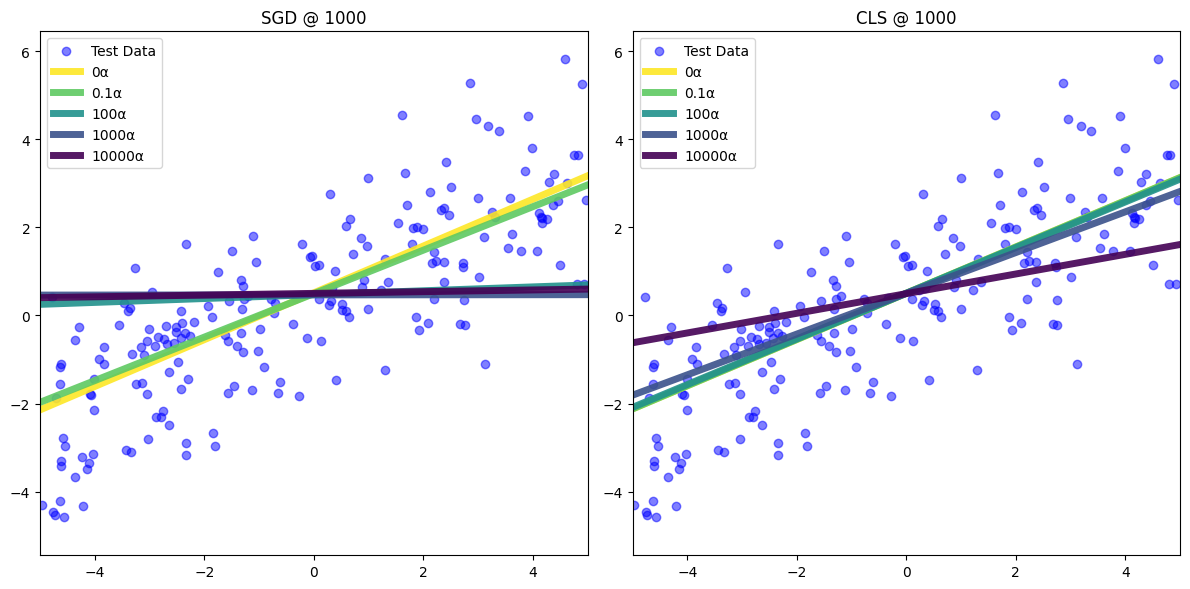

In [663]:
# Linear Datset Testing
xlin, ylin = generate_polynomial_dataset(1, 1000)
x_train, x_test, y_train, y_test = get_split(xlin, ylin)

sgd_results = []
cls_results = []
for alpha in test_alphas:
        sgd_results.append(get_sgd_results(alpha,x_train, y_train)) 
        cls_results.append(get_cls_results(alpha,x_train, y_train))

plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, 1000)


### Quadratic Dataset Regression

In [664]:
# Quadratic dataset testing
xquad, yquad = generate_polynomial_dataset(2,1000)
x_train, x_test, y_train, y_test = get_split(xquad, yquad)
x_train_poly = get_split_poly(x_train, 2)
x_test_poly = get_split_poly(x_test, 2)

y_train.shape 


(800,)

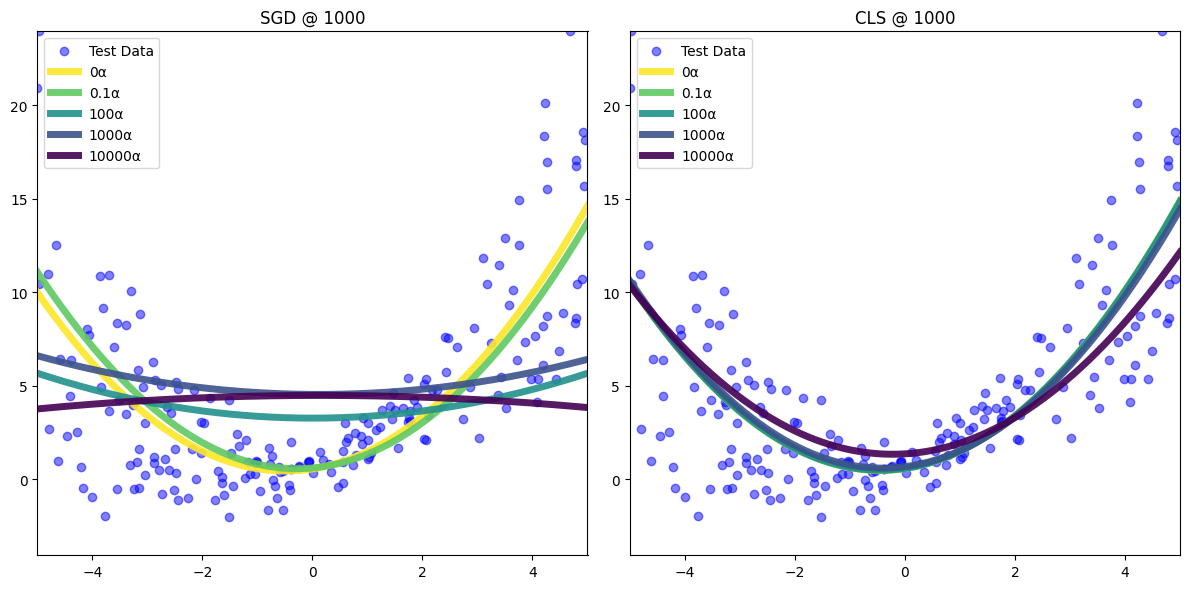

In [665]:
sgd_results = []
cls_results = []
for alpha in test_alphas:
        sgd_results.append(get_sgd_results(alpha,x_train_poly, y_train))
        cls_results.append(get_cls_results(alpha,x_train_poly, y_train))

plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, 1000)



### Cubic Dataset Regression


In [666]:
from sklearn.preprocessing import PolynomialFeatures

# Cubic dataset testing
x_cubic, y_cubic = generate_polynomial_dataset(3,1000)
x_train, x_test, y_train, y_test = get_split(x_cubic,y_cubic)

x_train_poly = get_split_poly(x_train, 3)
x_test_poly = get_split_poly(x_test, 3)

x_train_poly = StandardScaler().fit_transform(x_train_poly)
x_test_poly = StandardScaler().fit_transform(x_test_poly)


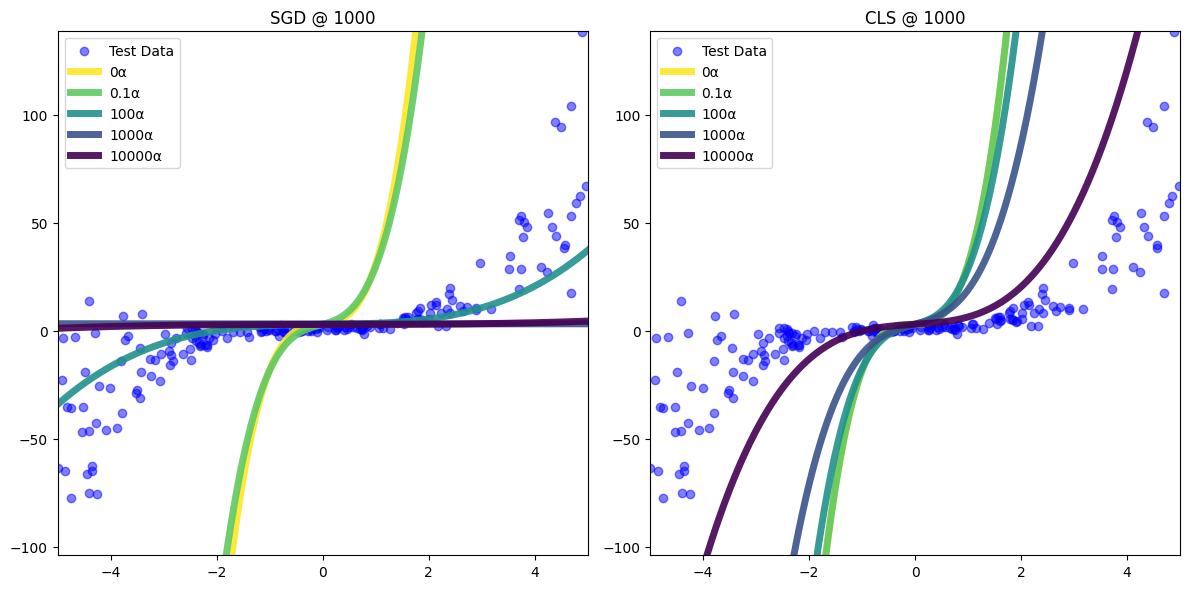

In [667]:
sgd_results = []
cls_results = []
for alpha in test_alphas:
        sgd_results.append(get_sgd_results(alpha,x_train_poly, y_train))
        cls_results.append(get_cls_results(alpha,x_train_poly, y_train))

plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, 1000)

## First Results

As we can see in the first results, for a sample size of 1000 and polynomial degree of less than or equal to 3, the regularisation has a much greater effect on the SGDRegressor. However, the exploration of hyperparameters is rather small, so we must examine large sample sizes, and larger polynomial degrees.

## Higher Degree Polynomials and Large n_samples

For further testing, we will examine:

1. A cubic dataset, with samples 1000, 2000, 5000, 10000
2. Datasets of polynomial degree 4,5,8,11
3. A higher polynomial degree of 11 alongside a higher sample size of 5000


### Cubic Datasets of varying sample size


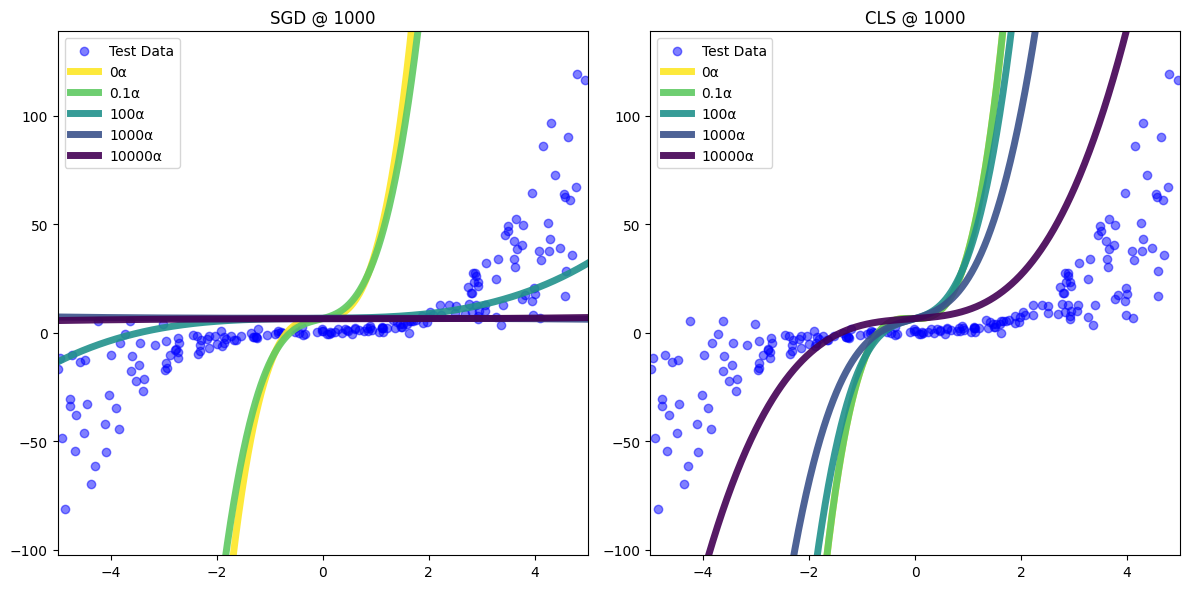

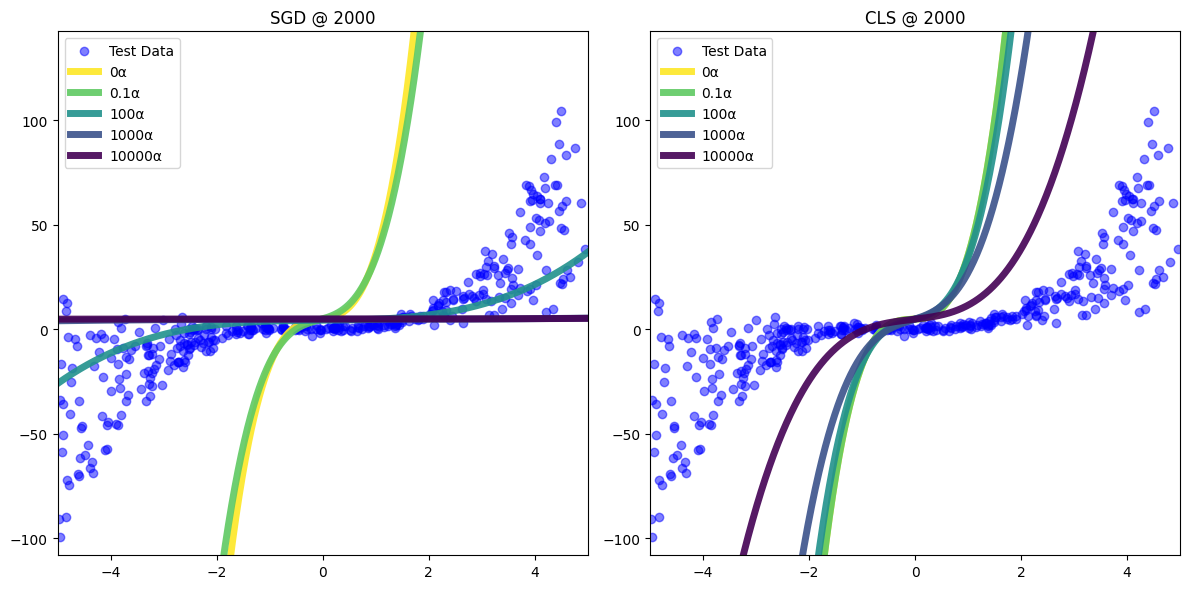

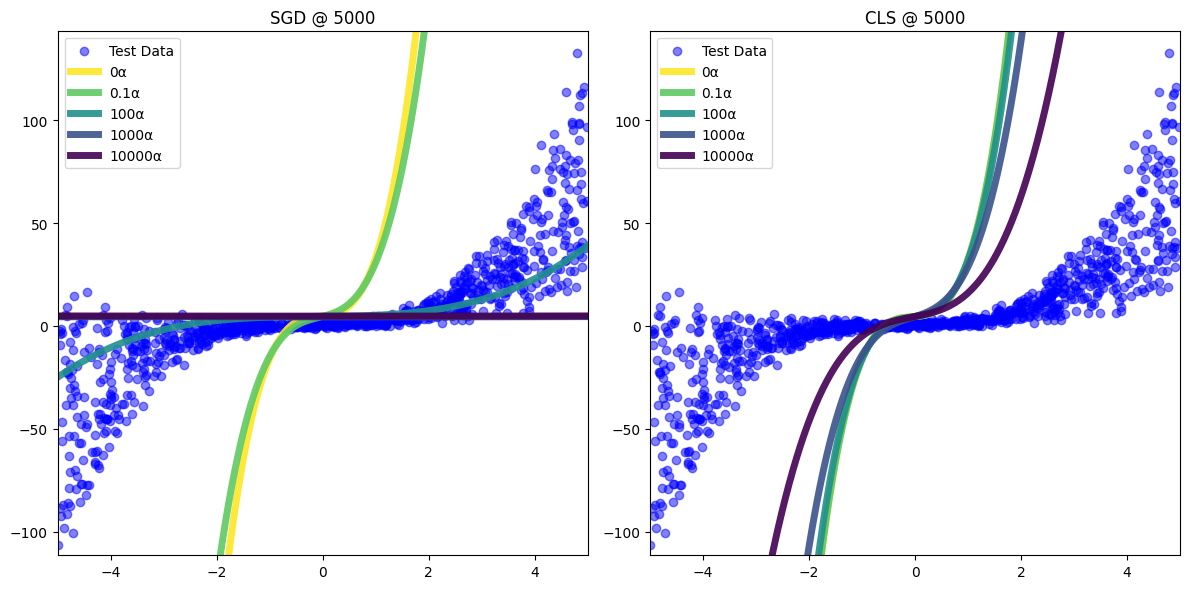

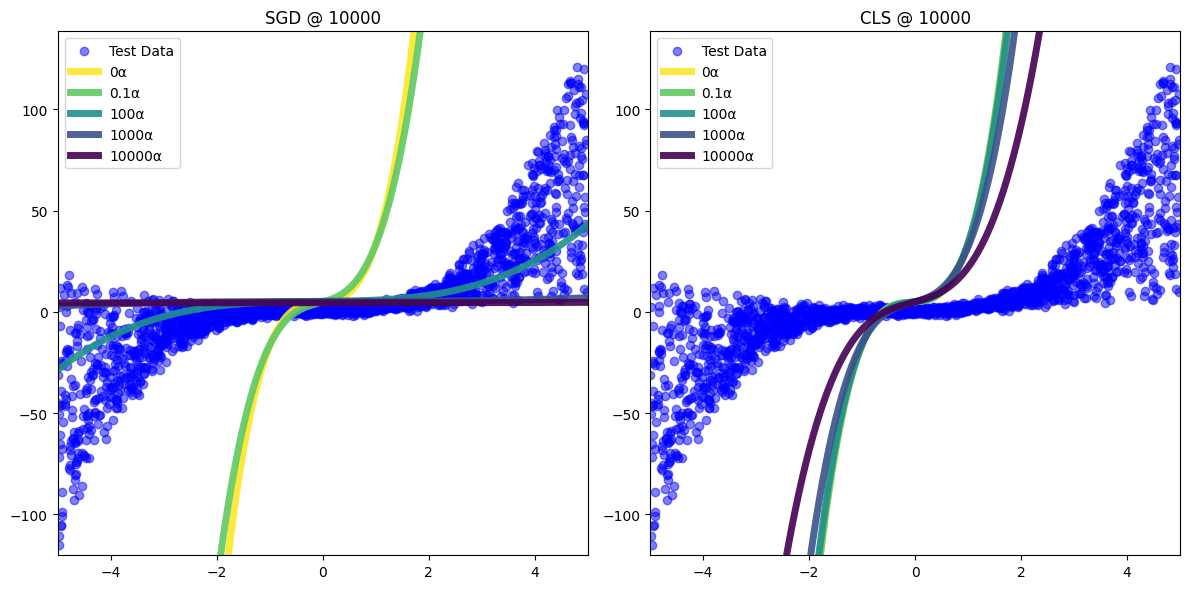

In [668]:

# Higher degree polynomial dataset testing
sample_sizes = [1000, 2000, 5000, 10000]
degree = 3

for sample_size in sample_sizes:
    cubic_x, cubic_y = generate_polynomial_dataset(degree,sample_size)
    x_train, x_test, y_train, y_test = get_split(cubic_x,cubic_y)
    x_train_poly = get_split_poly(x_train, degree)
    x_test_poly = get_split_poly(x_test, degree)

    
    x_train_poly = StandardScaler().fit_transform(x_train_poly)
    x_test_poly = StandardScaler().fit_transform(x_test_poly)

    x_train_poly.shape, x_test_poly.shape, y_train.shape, y_test.shape

    sgd_results = []
    cls_results = []
    for alpha in test_alphas:
            sgd_results.append(get_sgd_results(alpha,x_train_poly, y_train))
            cls_results.append(get_cls_results(alpha,x_train_poly, y_train))
            
    plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, sample_size)

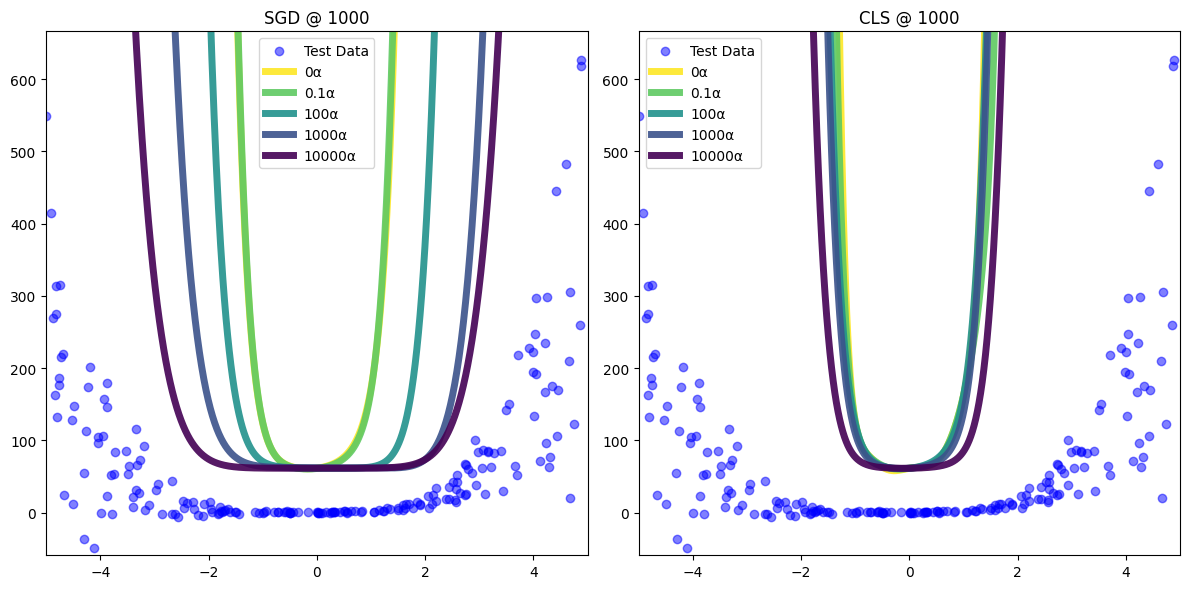

In [669]:
# Higher degree polynomial dataset testing
sample_size = 1000
degree = 4
x_8th, y_8th = generate_polynomial_dataset(degree,sample_size)
x_train, x_test, y_train, y_test = get_split(x_8th,y_8th)
x_train_poly = get_split_poly(x_train, 8)
x_test_poly = get_split_poly(x_test, 8)


x_train_poly = StandardScaler().fit_transform(x_train_poly)
x_test_poly = StandardScaler().fit_transform(x_test_poly)

x_train_poly.shape, x_test_poly.shape, y_train.shape, y_test.shape

sgd_results = []
cls_results = []
for alpha in test_alphas:
        sgd_results.append(get_sgd_results(alpha,x_train_poly, y_train))
        cls_results.append(get_cls_results(alpha,x_train_poly, y_train))

plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, 1000)

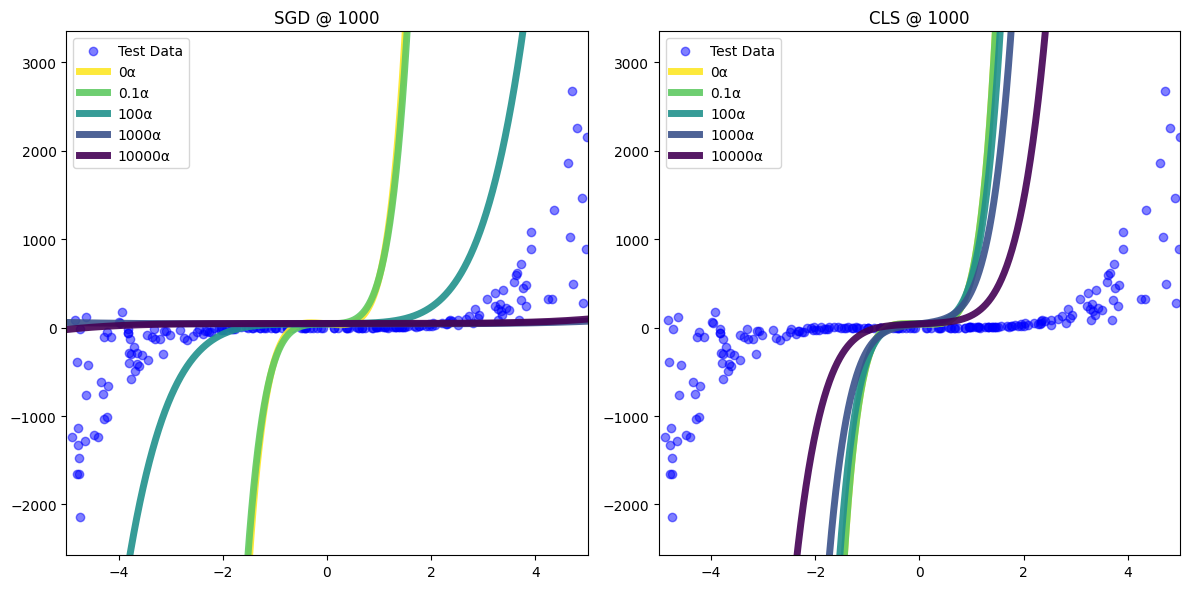

In [670]:
# Higher degree polynomial dataset testing

# Higher degree polynomial dataset testing
sample_size = 1000
degree = 5
x, y = generate_polynomial_dataset(degree,sample_size)
x_train, x_test, y_train, y_test = get_split(x,y)
x_train_poly = get_split_poly(x_train, degree)
x_test_poly = get_split_poly(x_test, degree)


x_train_poly = StandardScaler().fit_transform(x_train_poly)
x_test_poly = StandardScaler().fit_transform(x_test_poly)

x_train_poly.shape, x_test_poly.shape, y_train.shape, y_test.shape

sgd_results = []
cls_results = []
for alpha in test_alphas:
        sgd_results.append(get_sgd_results(alpha,x_train_poly, y_train))
        cls_results.append(get_cls_results(alpha,x_train_poly, y_train))

plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, 1000)

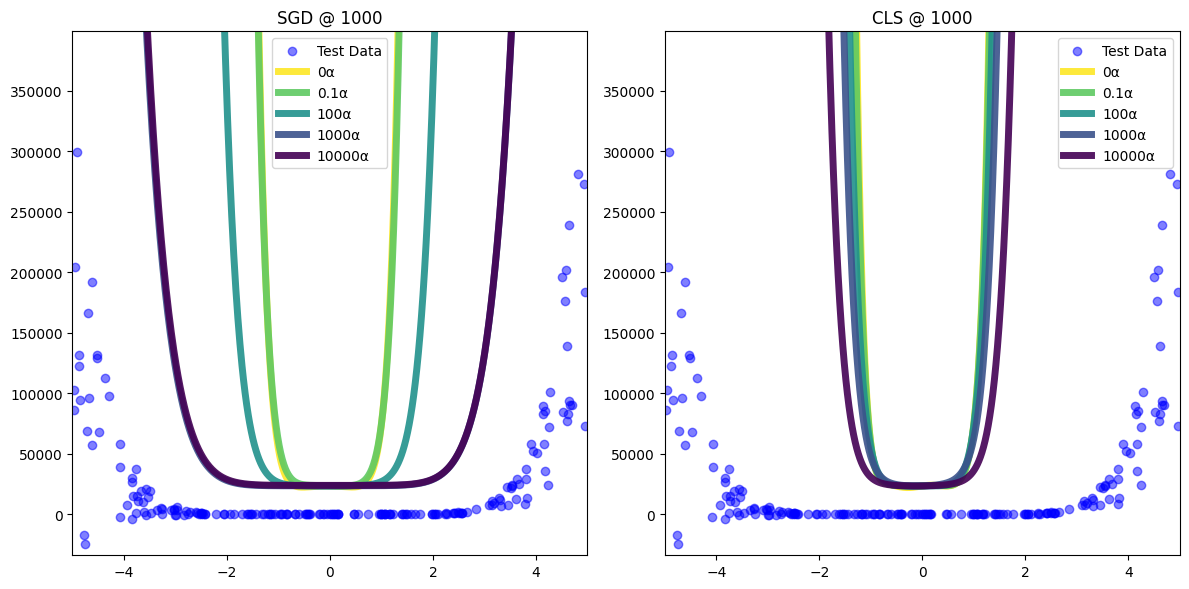

In [671]:
# Higher degree polynomial dataset testing

# Higher degree polynomial dataset testing
sample_size = 1000
degree = 8
x, y = generate_polynomial_dataset(degree,sample_size)
x_train, x_test, y_train, y_test = get_split(x,y)
x_train_poly = get_split_poly(x_train, degree)
x_test_poly = get_split_poly(x_test, degree)


x_train_poly = StandardScaler().fit_transform(x_train_poly)
x_test_poly = StandardScaler().fit_transform(x_test_poly)

x_train_poly.shape, x_test_poly.shape, y_train.shape, y_test.shape

sgd_results = []
cls_results = []
for alpha in test_alphas:
        sgd_results.append(get_sgd_results(alpha,x_train_poly, y_train))
        cls_results.append(get_cls_results(alpha,x_train_poly, y_train))

plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, 1000)

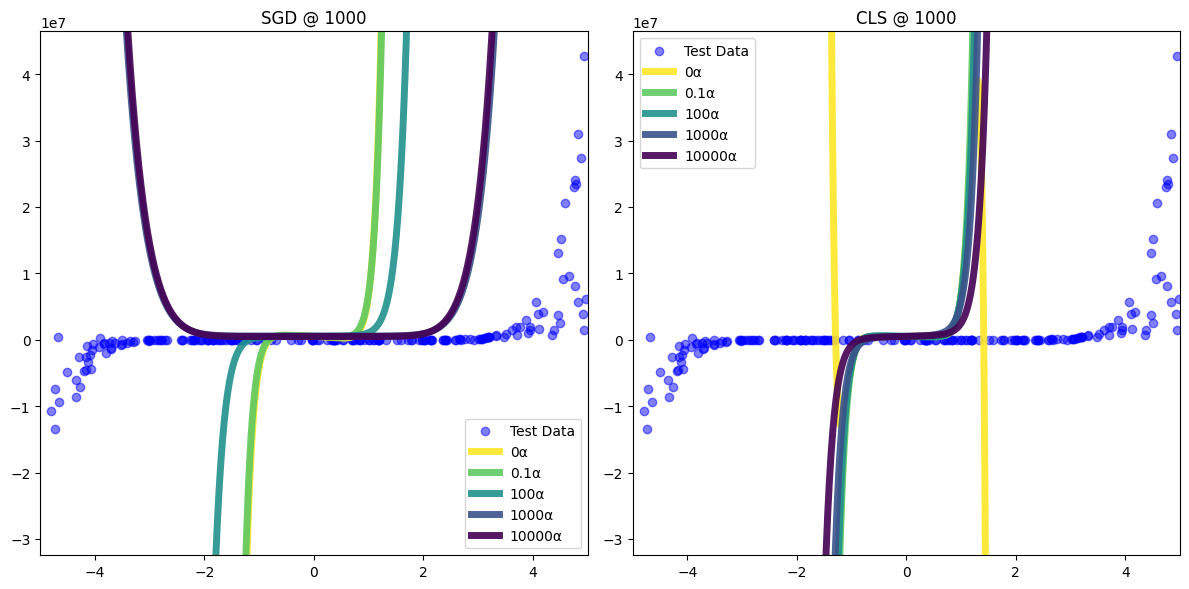

In [672]:
# Higher degree polynomial dataset testing

# Higher degree polynomial dataset testing
sample_size = 1000
degree = 11
x, y = generate_polynomial_dataset(degree,sample_size)
x_train, x_test, y_train, y_test = get_split(x,y)
x_train_poly = get_split_poly(x_train, degree)
x_test_poly = get_split_poly(x_test, degree)


x_train_poly = StandardScaler().fit_transform(x_train_poly)
x_test_poly = StandardScaler().fit_transform(x_test_poly)

x_train_poly.shape, x_test_poly.shape, y_train.shape, y_test.shape

sgd_results = []
cls_results = []
for alpha in test_alphas:
        sgd_results.append(get_sgd_results(alpha,x_train_poly, y_train))
        cls_results.append(get_cls_results(alpha,x_train_poly, y_train))

plot_sidebyside(sgd_results, cls_results, test_alphas, x_test, y_test, y_train, 1000)

## Discussion of Results



# Part 2 Support Vector Classifiers

The implementation of machine learning models in medical imaging has been a revolutionary tool for the classification and identification of potential medical conditions. Within this part of the notebook, I will be investigating the implemenetation of a Support Vector Classifier, in order to classify malignant or benign breast features. 

## What is a support vector classifier?



## Dataset

 For this task, we will be using the *Diagnostic Wisconsin Breast Cancer Database*, sourced from:

https://doi.org/10.24432/C5DW2B

The dataset contains 32 features, in the following format.

1. Patient Identification Number
2. Diagnosis, where x $\in [M, B]$, with M being Malignant and B being Benign

As the identification number has no influence on the classification, we can remove it. For the next 30 Features, it is the *mean*, *standard error* and *worst* ( or largest ) of the following features:

- Mean values of cell nuclei features (radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension)
- Standard error of these features
- Worst (largest) values of these features
- Diagnosis labels: Malignant (M) or Benign (B)
- The dataset contains 569 samples, with 357 benign and 212 malignant cases.
- The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
- Each feature is a real-valued number.
- The dataset is widely used for binary classification tasks in machine learning.
- The target variable is the diagnosis column, which we will encode for model training.


Thus, columns **3-11** are mean, columns **12-21** are standard error, and columns **22-31**. 

We can implement this by reading in the database with pandas. 

In [673]:
import pandas as pd

data = pd.read_csv('wdbc.data', header=None)

# Column 0 is the ID, which is not need for classification
# Column 1 is the diagnosis, needed as the label of the classification
# 2 - 11 are mean values
# 12 - 21 are standard error
# 22 - 31 are worst

# Dropping the ID column
data.drop(columns=[0], inplace=True)

# Naming the columns
data.columns = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
               'smoothness_mean','compactness_mean','concavity_mean','concave_points_mean',
               'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se',
               'area_se','smoothness_se','compactness_se','concavity_se','concave_points_se',
               'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
               'area_worst','smoothness_worst','compactness_worst','concavity_worst',
               'concave_points_worst','symmetry_worst','fractal_dimension_worst']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Dataset Cleaning

In order to process and classify the data, we must encode the classification labels, *M* and *B* into a integer for the model. Thus, we will use sklearn's *OrdinalEncoder* to do this for us.

In [674]:
from sklearn.preprocessing import OrdinalEncoder

labels = data.iloc[:, 0].values

# get count of each label
count = np.unique(labels, return_counts=True)
labels = pd.DataFrame(labels, columns=["diagnosis"])

print(labels.head(5).to_numpy())

enc = OrdinalEncoder(categories=[["M", "B"]])
labels_encoded = enc.fit_transform(labels)
labels_encoded = np.reshape(labels_encoded, -1)

mean_data = data.iloc[:, 1:11].values

stde_data = data.iloc[:, 11:21].values

worst_data = data.iloc[:, 21:31].values

mean_data.shape, stde_data.shape, worst_data.shape

labels_encoded[:5],


[['M']
 ['M']
 ['M']
 ['M']
 ['M']]


(array([0., 0., 0., 0., 0.]),)

As we can see, the *M* label got encoded into 0, and the B label will thus have been encoded into 1. 

### Dataset Splitting

Using the same functions as in the previous section of the notebook, we can get a train-test split for classification. I will be using just the mean-data for this classification.

In [675]:
x_train, x_test, y_train, y_test = get_split(mean_data, labels_encoded)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 10), (114, 10), (455,), (114,))

## Grid Search and the SVC model

In order to evaluate the SVC model, we will be implementing a GridSearchCV alongside scikit's SVC model to identify optimal hyper-parameters for the classification. I have opted to use a polynomial kernel, so the hyper-parameters investigated will be $C$ and the *degree* of the the kernel. 

In [676]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
params = {
    'C': [0.1, 1, 10, 50],
    'degree': [2, 5, 9],
}

Within the grid search, I will be implementing the GridSearchCV with a 5-fold cross validation, 

### Precision vs Recall Curves

Whe

Precision: True Positives vs All positives

Recall: True Positives vs False Negatives: !!!!!! most important as we want to ensure we don't miss any malignant tumours.

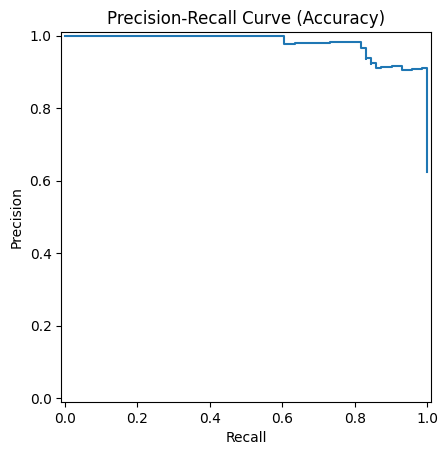

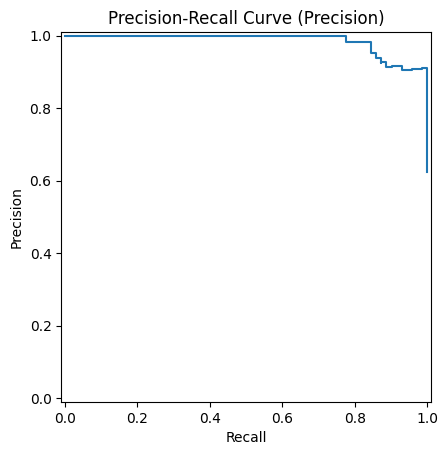

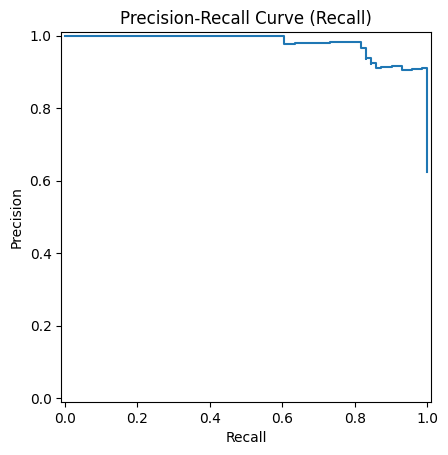

In [677]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

# list of param combinations, with precision, recall, accuracy

scoring = ['accuracy', 'precision', 'recall']

for sc in scoring:
    svc_gs = GridSearchCV(SVC(class_weight='balanced'), params, cv=5,scoring=sc)
    svc_gs.fit(x_train, y_train)

    best_model = svc_gs.best_estimator_

    y_scores = best_model.decision_function(x_test)  

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f"Precision-Recall Curve ({sc.capitalize()})")


In [678]:
x_train, x_test, y_train, y_test = train_test_split(mean_data, labels, test_size=0.2, random_state=42)
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

m:\work\ML-Project-1\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

[[67  4]
 [ 3 40]]


### Testing the model

### Feasiblity